# Group 272 - DM Assignment
## Assignment - 2

### Classification techniques to predict whether a gene is from a plant or an animal from the relevant genomic data extracted from 
**http://www.global-engage.com/agricultural-biotechnology/best-plant-genome-database/’<br>
http://www.plantgdb.org/**

Depending upon various genetic characterists, classification of a gene belonging to Plant or Animal to be predicted

## Load Dataset and Check the data load

Library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Adding a global style to seaborn plots
sns.set(style="darkgrid")

Load the gene dataset

In [2]:
# Load the data

gene_data = pd.read_csv("SampleGeneticData.csv")

# Check the initial rows of the data and verify the data load
gene_data.head()

,Colour,Cell_Cycle_Cat,Cell_Cycle_Number,Gene_Induction,chromosome,description,type_of_gene,Class
0,Yellow,21-28,21,1,2,insulin like growth factor 2 receptor,protein-coding,Animal
1,Yellow,13-20,17,1,20,coagulation factor X,protein-coding,Animal
2,Yellow,13-20,19,1,X1,complement factor D,protein-coding,Animal
3,Green,21-28,28,0,11,sperm autoantigenic protein 17,protein-coding,Animal
4,Red,13-20,16,1,3,insulin like growth factor 2,protein-coding,Animal


We will take a quick look at the data set structure

In [3]:
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Colour             4000 non-null   object
 1   Cell_Cycle_Cat     4000 non-null   object
 2   Cell_Cycle_Number  4000 non-null   int64 
 3   Gene_Induction     4000 non-null   int64 
 4   chromosome         4000 non-null   object
 5   description        4000 non-null   object
 6   type_of_gene       4000 non-null   object
 7   Class              4000 non-null   object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


We would check for missing values by columns in case there are any

In [4]:
gene_data.isna().sum()

Colour               0
Cell_Cycle_Cat       0
Cell_Cycle_Number    0
Gene_Induction       0
chromosome           0
description          0
type_of_gene         0
Class                0
dtype: int64

we do not see any missing values, however individual columns need to be explored for any inconsistencies

## Data Preprocessing and Data Exploration

We will perform some column coversions before we begin our exploration

### Exploration of the target variable - 'Class'

Animal    2000
Plant     2000
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

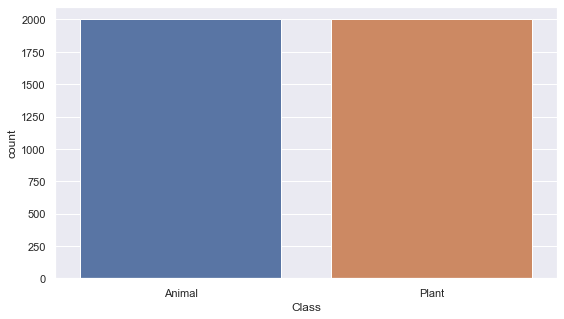

In [5]:
print(gene_data['Class'].value_counts())
plt.figure(figsize=(9, 5))
sns.countplot(gene_data['Class'])

The target class distibution in the dataset is very balanced, which is a good scenario for classification as the algorithm(s) getting used will have equal data points to be trained in both the class variables

### Exploration of the Colour Attribute

We will explore this variable distribution by the target class variable

In [6]:
gene_data.groupby('Class')['Colour'].value_counts()

Class   Colour
Animal  Yellow    1063
        Red        676
        Green      261
Plant   Green     1461
        Yellow     438
        Red        101
Name: Colour, dtype: int64

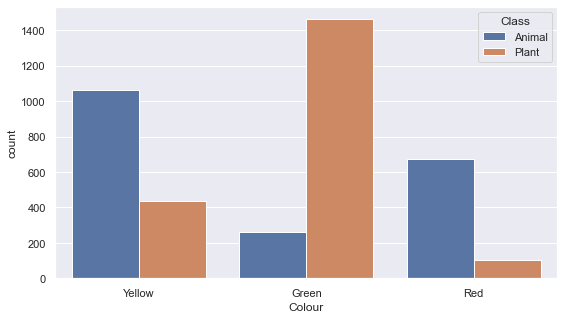

In [7]:
# A quick visualization of the same
plt.figure(figsize=(9, 5))
sns.countplot(x='Colour', hue='Class', data=gene_data);

Observations which can be made from the above visualization
- Amongst all Green colouration in gene , majority belongs to Plant category (which is valid - because of the presence of chlorophyll)

- In Red and Yellow coloration in genes, Animal proportions is more

### Exploration of the Cell_Cycle_Cat Attribute

In [8]:
# We will see the frequency table of this attribute
gene_data['Cell_Cycle_Cat'].value_counts()

13-20     1946
21-28     1269
05-Dec     785
Name: Cell_Cycle_Cat, dtype: int64

*The data **05-Dec** seems to be an erroneous data on the **Cell_Cycle_Cat column**, which needs to be corrected*

One of the approach to correct the data <br>
- This column is related to the immediate adjacent column "Cell_Cycle_Number"
- We will check the minimum and max value for this column when "Cell_Cyle_Cat" is "05-Dec"
- Depending on the values we may reuse the existing categories or assign a new category

In [9]:
# Minimum and maximum value of Cell_Cylcle_Number where Cell_Cycle_Cat is '05-Nov'
min_value = min(gene_data[gene_data['Cell_Cycle_Cat'] == '05-Dec']['Cell_Cycle_Number'])
max_value = max(gene_data[gene_data['Cell_Cycle_Cat'] == '05-Dec']['Cell_Cycle_Number'])
print(f"Miniumum Value - {min_value}")
print(f"Maximum Value - {max_value}")

Miniumum Value - 5
Maximum Value - 12


We will create a new category as "5-12" and replace this value to maintain the consistent correlation between Cell_Cycle_Cat and Cell_Cycle_Number

In [10]:
replace_value = str(min_value)+'-'+str(max_value)
gene_data.loc[:, 'Cell_Cycle_Cat'].replace('05-Dec', replace_value, inplace=True)

In [11]:
# Now we will visualize the frequency distribution by the target variable
gene_data.groupby('Class')['Cell_Cycle_Cat'].value_counts()

Class   Cell_Cycle_Cat
Animal  21-28              986
        13-20              817
        5-12               197
Plant   13-20             1129
        5-12               588
        21-28              283
Name: Cell_Cycle_Cat, dtype: int64

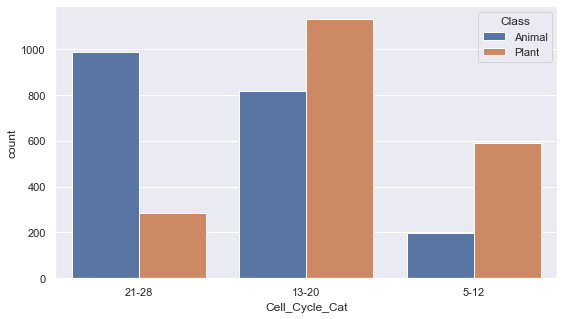

In [12]:
# A quick visualization of the same
plt.figure(figsize=(9, 5))
sns.countplot(x='Cell_Cycle_Cat', hue='Class', data=gene_data);

### Exploration of Cell_Cycle_Number

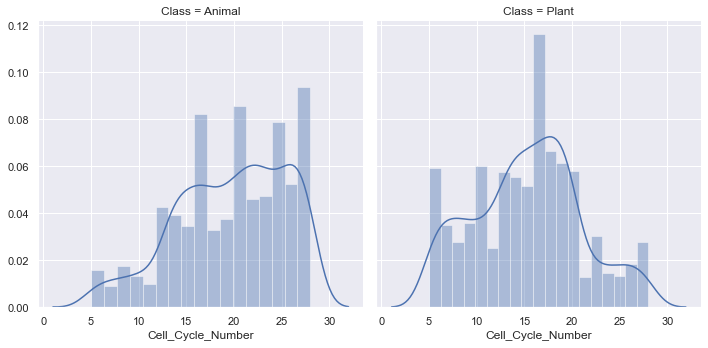

In [13]:
# A quick visualization of the same
g = sns.FacetGrid(data=gene_data, col='Class', height=5)
g.map(sns.distplot, 'Cell_Cycle_Number')
plt.show()

#sns.distplot(gene_data['Cell_Cycle_Number'])

From both the distributions, we conclude there there are marginally skewed distributions amongst plant genes in our dataset

In [14]:
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Colour             4000 non-null   object
 1   Cell_Cycle_Cat     4000 non-null   object
 2   Cell_Cycle_Number  4000 non-null   int64 
 3   Gene_Induction     4000 non-null   int64 
 4   chromosome         4000 non-null   object
 5   description        4000 non-null   object
 6   type_of_gene       4000 non-null   object
 7   Class              4000 non-null   object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


### Exploration of Gene_Induction

In [15]:
gene_data.groupby('Class')['Gene_Induction'].value_counts()

Class   Gene_Induction
Animal  1                 1622
        0                  378
Plant   1                 1040
        0                  960
Name: Gene_Induction, dtype: int64

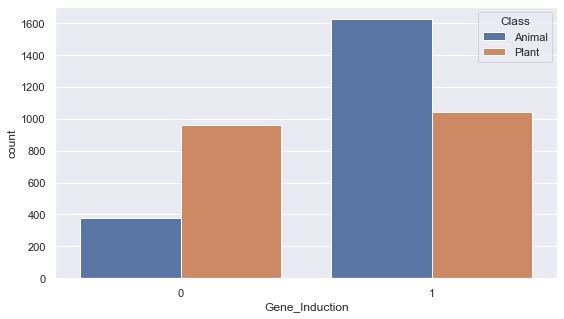

In [16]:
# A quick visualization of the same
plt.figure(figsize=(9, 5))
sns.countplot(x='Gene_Induction', hue='Class', data=gene_data);

It is getting observed that gene induction on Animal genes are much more than that of Plant genes

### Exploration of Chromosome

In [17]:
gene_data['chromosome'].unique()

array(['2', '20', 'X1', '11', '3', '13', '8', '6', '18', 'MT', '-', '1',
       '10', '12', 'X2', '4', '5', '7', '19', '21', '14', 'X5', '17',
       '15', 'Un', '9', 'X3', 'X4', '16'], dtype=object)

It is observed that *some of the Chromosome has data as "-"....We will replace the data as "NA" (Not available)* ... Decision trees and Random Forests and Naive Bayes would simply treat it as a different category and would categorise 

In [18]:
gene_data.loc[:, 'chromosome'].replace('-', 'NA', inplace=True)

# We will re-execute the frequency 
gene_data.groupby('Class')['chromosome'].value_counts()

Class   chromosome
Animal  2             208
        X1            195
        4             192
        1             173
        3             172
        5             111
        8              99
        X5             92
        13             73
        11             72
        14             70
        7              58
        X2             55
        10             46
        19             46
        12             40
        6              39
        15             38
        17             37
        X3             29
        NA             27
        Un             27
        21             25
        16             20
        18             16
        20             13
        MT             13
        9               7
        X4              7
Plant   NA            284
        Un            255
        5             218
        2             188
        7             176
        1             164
        3             163
        4             127
        8          

<Figure size 648x360 with 0 Axes>

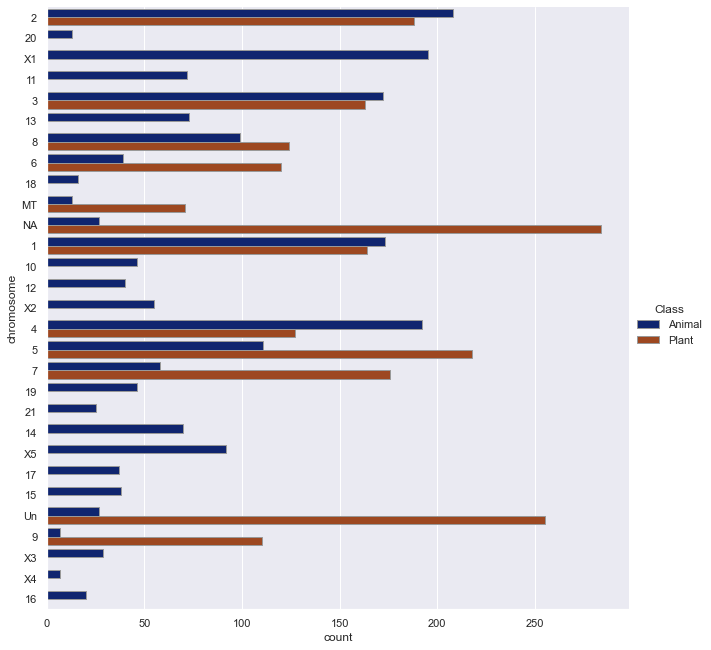

In [19]:
# We will attempt to visualize this distribution
plt.figure(figsize=(9,5))
sns.catplot(y='chromosome', hue='Class', kind='count', palette="dark", edgecolor=".6", height = 9, data=gene_data);

*A very interesting observation is emerging out* - **X chromosomes are available for only Animal Species**

### Exploration of type_of_gene Column

In [20]:
gene_data.groupby('Class')['type_of_gene'].value_counts()

Class   type_of_gene  
Animal  protein-coding    1943
        pseudo              54
        ncRNA                2
        other                1
Plant   protein-coding    1714
        tRNA               117
        ncRNA               85
        pseudo              64
        rRNA                19
        other                1
Name: type_of_gene, dtype: int64

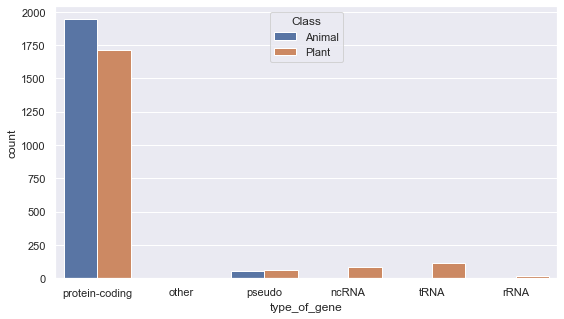

In [21]:
# A quick visualization of the same
plt.figure(figsize=(9, 5))
sns.countplot(x='type_of_gene', hue='Class', data=gene_data);

*protein-coding* type of gene dominates the distribution

### Exploration of the Text Column - "Descripion"

One of the approach to explore this column is to apply NLP based text modelling approach - Latent Drichilet Allocation to divide each of the descriptions into a distinct "n" number of topics and then apply that distinct topic column for further classification

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

We would want to ignore certain words which are common across almost all of the documents, this is in order to have the 
**LDA identify the topics correctly**

This says we ignore words which are present across 95% of the documents and ignore words which are present in less than 2 documents, which means for a word to be considered, it has to be present in atleast 2 documents

In [23]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# Now we will apply the count vectorizer and generate a document term matrix
dtm = cv.fit_transform(gene_data['description'])

# Check the dtm
dtm

<4000x1161 sparse matrix of type '<class 'numpy.int64'>'
	with 13005 stored elements in Compressed Sparse Row format>

**Now we will run the LDA**

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

# We will select 5 distinct topics
LDA = LatentDirichletAllocation(n_components=7, random_state=101)

In [25]:
# This can take a while, we are dealing with large number of documents here
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=101)

**We will interpret the LDA Results**

In [26]:
# Get the vocabulary of words

len(cv.get_feature_names()) # This also matches with the number of columns in our sparse matrix

1161

In [27]:
# get a random feature name
cv.get_feature_names()[220]

'biosynthesis'

In [28]:
# Now we will attach the topic numbers to the original articles

# In order to do this, we would need to apply the transform method on our LDA model and DTM to associate the topic to each
# article
topic_results = LDA.transform(dtm)

# Now we will check the shape
topic_results.shape

(4000, 7)

If we check the first element, we will get the probabilities of each of the 11992 articles belonging to one of the 5 topics

In [29]:
# to see this better
topic_results[0].round(2)

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.86])

It has 87% probability of belonging to topic 5

In [30]:
# We will grab the index position of the highest probability
topic_results[0].argmax()

6

Now we will setup a loop which will print out the top 10 words with highest probabilities for each of the decided topics

In [31]:
for index, topic in enumerate(LDA.components_):
    print(f"THE TOP 10 WORDS FOR TOPIC #{index}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print("\n")

THE TOP 10 WORDS FOR TOPIC #0
['atpase', 'serine', 'probable', 'beta', 'mitochondrial', 'trna', 'kinase', 'protein', 'complex', 'subunit']


THE TOP 10 WORDS FOR TOPIC #1
['ankyrin', 'coiled', 'coil', 'type', 'repeat', 'zinc', 'finger', 'protein', 'domain', 'containing']


THE TOP 10 WORDS FOR TOPIC #2
['chloroplastic', 'probable', 'rna', 'ii', 'synthase', 'photosystem', 'hypothetical', 'binding', 'ribosomal', 'protein']


THE TOP 10 WORDS FOR TOPIC #3
['e3', 'oxidase', 'repeat', 'pentatricopeptide', 'alpha', 'subunit', 'ligase', 'protein', 'ubiquitin', 'uncharacterized']


THE TOP 10 WORDS FOR TOPIC #4
['factor', 'homolog', 'box', 'interacting', 'binding', 'chloroplastic', 'associated', 'kinase', 'like', 'protein']


THE TOP 10 WORDS FOR TOPIC #5
['ornanav1r', 'pseudogene', 'like', 'solute', 'carrier', 'vomeronasal', 'dehydrogenase', 'family', 'receptor', 'member']


THE TOP 10 WORDS FOR TOPIC #6
['type', 'leucine', 'kinase', 'rich', 'serine', 'subunit', 'receptor', 'transcription', '

In [32]:
# Associating topic to each of the documents

gene_data['Description_Topic'] = topic_results.argmax(axis=1)

gene_data.head()

,Colour,Cell_Cycle_Cat,Cell_Cycle_Number,Gene_Induction,chromosome,description,type_of_gene,Class,Description_Topic
0,Yellow,21-28,21,1,2,insulin like growth factor 2 receptor,protein-coding,Animal,6
1,Yellow,13-20,17,1,20,coagulation factor X,protein-coding,Animal,6
2,Yellow,13-20,19,1,X1,complement factor D,protein-coding,Animal,6
3,Green,21-28,28,0,11,sperm autoantigenic protein 17,protein-coding,Animal,2
4,Red,13-20,16,1,3,insulin like growth factor 2,protein-coding,Animal,6


## Data Preparation for Modelling

In [33]:
# We will create a specific dataset for modelling
# We will drop the columns "Cell_Cycle_Number because of its strong Correlation with Cell_Cycle_Cat"
# We will use the Description_topic column which has been introduced by performing LDA on Description Column

df_model = gene_data.drop(['Cell_Cycle_Number', 'description'], axis=1)
df_model.columns

Index(['Colour', 'Cell_Cycle_Cat', 'Gene_Induction', 'chromosome',
       'type_of_gene', 'Class', 'Description_Topic'],
      dtype='object')

We will numerically encode the categorical variables for modelling - using Sklearn Label Encoder

In [34]:
from sklearn.preprocessing import LabelEncoder
 
# Initialize the label encoder
label_encoder = LabelEncoder() 

# Encode labels in column 'species'. 
df_model['Colour'] = label_encoder.fit_transform(df_model['Colour']) 
df_model['Cell_Cycle_Cat'] = label_encoder.fit_transform(df_model['Cell_Cycle_Cat'])
df_model['chromosome'] = label_encoder.fit_transform(df_model['chromosome'])
df_model['type_of_gene'] = label_encoder.fit_transform(df_model['type_of_gene'])

## Train-Test Split

Before we run the train test split, we will need to shuffle the dataframe because the target variables are arranged in sequential order, which may create unbalanced distribution of the target variable in training and test dataset

In [35]:
df_model = df_model.sample(frac=1)

# Check the shuffled rows
df_model.head()

,Colour,Cell_Cycle_Cat,Gene_Induction,chromosome,type_of_gene,Class,Description_Topic
3017,2,0,0,19,2,Plant,6
386,2,0,1,5,2,Animal,6
1995,2,1,1,4,2,Animal,3
3524,0,2,1,0,2,Plant,3
2389,0,0,0,20,2,Plant,0


In [36]:
# Now we will perform the split

from sklearn.model_selection import train_test_split
features = df_model.drop('Class',axis=1)
target = df_model['Class']

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.30, random_state=101)

## Classification Model - Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the classifier

# We will build using both gini and entropy index

dtree_gini = DecisionTreeClassifier(criterion='gini', splitter='best')
# Fit on the training data
dtree_gini.fit(features_train, target_train)

dtree_entropy = DecisionTreeClassifier(criterion='entropy', splitter='best')
# Fit on the training data
dtree_entropy.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy')

### Predictions and Evaluation of Decision Tree

In [40]:
predictions_gini = dtree_gini.predict(features_test)
predictions_entropy = dtree_entropy.predict(features_test)

from sklearn.metrics import classification_report,confusion_matrix

print("Classification Report - Decision Tree Using Gini Index \n")
print(classification_report(target_test,predictions_gini))
print("Confusion Matrix - Decision Tree Using Gini Index\n")
print(confusion_matrix(target_test,predictions_gini))
print("\n")
print("Classification Report - Decision Tree Using Entropy \n")
print(classification_report(target_test,predictions_entropy))
print("Confusion Matrix - Decision Tree Using Entropy\n")
print(confusion_matrix(target_test,predictions_entropy))

Classification Report - Decision Tree Using Gini Index 

              precision    recall  f1-score   support

      Animal       0.83      0.87      0.85       587
       Plant       0.87      0.83      0.85       613

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

Confusion Matrix - Decision Tree Using Gini Index

[[509  78]
 [106 507]]


Classification Report - Decision Tree Using Entropy 

              precision    recall  f1-score   support

      Animal       0.82      0.87      0.84       587
       Plant       0.86      0.82      0.84       613

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.84      1200

Confusion Matrix - Decision Tree Using Entropy

[[508  79]
 [109 504]]


### Conclusion from Decision Tree

**Decision Tree** results, gives us the following **conclusions**

1. The **overall accuracy** is *85%* with **Gini Index** and *84%* with **Entropy (Information Gain)**
2. Both Gini and Entropy and Gini also shows comparable **Precision and Recall** at *85% and 84%* respectively
3. This shows a predictable **consistency in the classification - which is a favorable condition for ML based approach**

**Gini Index performs marginally better than Entropy in Decision Tree**

## Classification Model - Random Forests

In [41]:
# Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# we will build the random forest classifier both using entropy and gini index
rfc_gini = RandomForestClassifier(n_estimators=100, criterion='gini')
rfc_gini.fit(features_train, target_train)

rfc_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc_entropy.fit(features_train, target_train)

RandomForestClassifier(criterion='entropy')

### Predictions and Evaluation of Random Forest

In [42]:
# Predictions and Evaluation

predictions_gini = rfc_gini.predict(features_test)
predictions_entropy = rfc_entropy.predict(features_test)

from sklearn.metrics import classification_report,confusion_matrix

print("Classification Report - Random Forest Using Gini Index \n")
print(classification_report(target_test,predictions_gini))
print("Confusion Matrix - Random Forest Using Gini Index\n")
print(confusion_matrix(target_test,predictions_gini))
print("\n")
print("Classification Report - Random Forest Using Entropy \n")
print(classification_report(target_test,predictions_entropy))
print("Confusion Matrix - Random Forest Using Entropy\n")
print(confusion_matrix(target_test,predictions_entropy))

Classification Report - Random Forest Using Gini Index 

              precision    recall  f1-score   support

      Animal       0.85      0.85      0.85       587
       Plant       0.85      0.86      0.86       613

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

Confusion Matrix - Random Forest Using Gini Index

[[497  90]
 [ 85 528]]


Classification Report - Random Forest Using Entropy 

              precision    recall  f1-score   support

      Animal       0.85      0.86      0.85       587
       Plant       0.86      0.86      0.86       613

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

Confusion Matrix - Random Forest Using Entropy

[[502  85]
 [ 88 525]]


### Conclusion from Random Forest

**Random Forest** results, gives us the following **conclusions**

1. The **overall accuracy** is *85%* with **Gini Index** and *86%* with **Entropy (Information Gain)**
2. Both Gini and Entropy and Gini also shows comparable **Precision and Recall** at *85% and 86%* respectively
3. This shows a predictable **consistency in the classification - which is a favorable condition for ML based approach**

**Entropy (Information Gain) performs marginally better than Gini Index in Random Forest**

## Classification Model - Naive Bayes Classifier

In [43]:
# We will run the model with Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()

bayes_model.fit(features_test, target_test)

GaussianNB()

### Predictions and Evaluation of Naive Bayes Classifier

In [44]:
# Predictions and Evaluation

predictions_bayes = bayes_model.predict(features_test)

from sklearn.metrics import classification_report,confusion_matrix

print("Classification Report - Naive Bayes \n")
print(classification_report(target_test,predictions_bayes))
print("Confusion Matrix - Naive Bayes \n")
print(confusion_matrix(target_test,predictions_bayes))


Classification Report - Naive Bayes 

              precision    recall  f1-score   support

      Animal       0.65      0.92      0.76       587
       Plant       0.87      0.53      0.66       613

    accuracy                           0.72      1200
   macro avg       0.76      0.72      0.71      1200
weighted avg       0.76      0.72      0.71      1200

Confusion Matrix - Naive Bayes 

[[539  48]
 [288 325]]


### Conclusion from Naive Bayes Classifier

**Naive Bayes** results, gives us the following **conclusions**

1. The **overall accuracy** is *76%* with **Naive Bayes Classifier**
2. Both **Precision and Recall** at *76% and 72%* respectively

3. However it is being shown from the classification report that **Precision in classifying is considerably lower for Animals as compared to Plants**. *The alogorithm is missing to classify Animals as compared to Plants*.

3. This Algorithm is not a favorable algorithm due to many missclassifications in *Animal*

**Naive Bayes performs worse than Both Decision Trees and Random Forest due to many miss classification in Animal Genes**

## Overall Conclusion and Recommendation

**Both Tree based approaches performs well and provides consistent results**

1. If **extraction of rules are important for downstream business systems - Decision Tree is recommended**

2. If **rules extraction are not necessity - We should used Random Forest**